<a href="https://colab.research.google.com/github/Anushree-B/Lie-detector/blob/main/Lie_detector_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("politifact_updated.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Politician,Quote,Image URL,char_count,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count
0,0,0,Tyler August,Nearly of all UW graduates stay in Wiscon...,TRUE,79.0,12.0,4.916667,1.0,0.0,4.0,2.0,1.0,0.0000,2
1,1,1,Mark Pocan,We passed bills last year which is the fe...,TRUE,73.0,12.0,4.583333,0.0,2.0,3.0,2.0,2.0,-0.5719,2
2,2,2,Lisa Subeck,The United States is an outlier one of only ...,TRUE,160.0,29.0,4.379310,1.0,3.0,9.0,3.0,4.0,0.6199,3
3,3,3,Brian Schimming,We ve had elections in years in Wiscons...,TRUE,99.0,16.0,4.250000,0.0,1.0,4.0,5.0,0.0,0.0000,1
4,4,4,Tammy Baldwin,We re facing situations these days where you ...,TRUE,144.0,25.0,4.600000,0.0,1.0,8.0,5.0,3.0,-0.0772,2


# Data preprocessing and cleaning

The target variable currently is Imahe URL, consisting of 6 truth values, converting that variable to Truth value having only 3 truth values

In [ ]:
df['Image URL'] = df['Image URL'].map({"TRUE" : 0, "mostly-true" : 1, "half-true" : 2, "barely-true" :3, "FALSE": 4 , "pants-fire": 5})

In [ ]:
df_new = df

In [ ]:
mapping = {
    0: 0,
    1: 0,
    2: 1,
    3: 2,
    4: 2,
    5: 2
}

# Apply the mapping to the 'truth_value' column
df['Truth value'] = df['Image URL'].map(mapping)

Dropping unnecessary columns

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1','char_count','Image URL'], axis = 1)

In [ ]:
politicians_to_drop = ['Facebook posts','Viral image','Instagram posts','Bloggers','X posts','TikTok posts','Social Media']
df = df[~df['Politician'].isin(politicians_to_drop)]

In [ ]:
politicians_to_keep = df['Politician'].value_counts()[df['Politician'].value_counts() > 150].index.tolist()
df = df[df['Politician'].isin(politicians_to_keep)]

In [ ]:
df.shape

(1419, 12)

In [ ]:
#df = df.drop(['Politician','Quote'], axis = 1)
df = df.drop(['Quote'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Politician'] = le.fit_transform(df['Politician'])

In [ ]:
df = df.drop(['Politician'], axis = 1)

In [ ]:
df.head()

,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count,Truth value
12,11.0,5.181818,0.0,2.0,5.0,1.0,0.0,0.0000,1,0
30,9.0,5.555556,0.0,1.0,4.0,1.0,2.0,0.0000,1,0
51,13.0,4.692308,2.0,0.0,4.0,3.0,0.0,0.0000,2,0
157,20.0,4.850000,0.0,1.0,5.0,5.0,2.0,0.0176,1,0
168,20.0,3.900000,0.0,2.0,7.0,4.0,0.0,0.0000,2,0


Checking outliers and removing them if necessary

<Axes: >

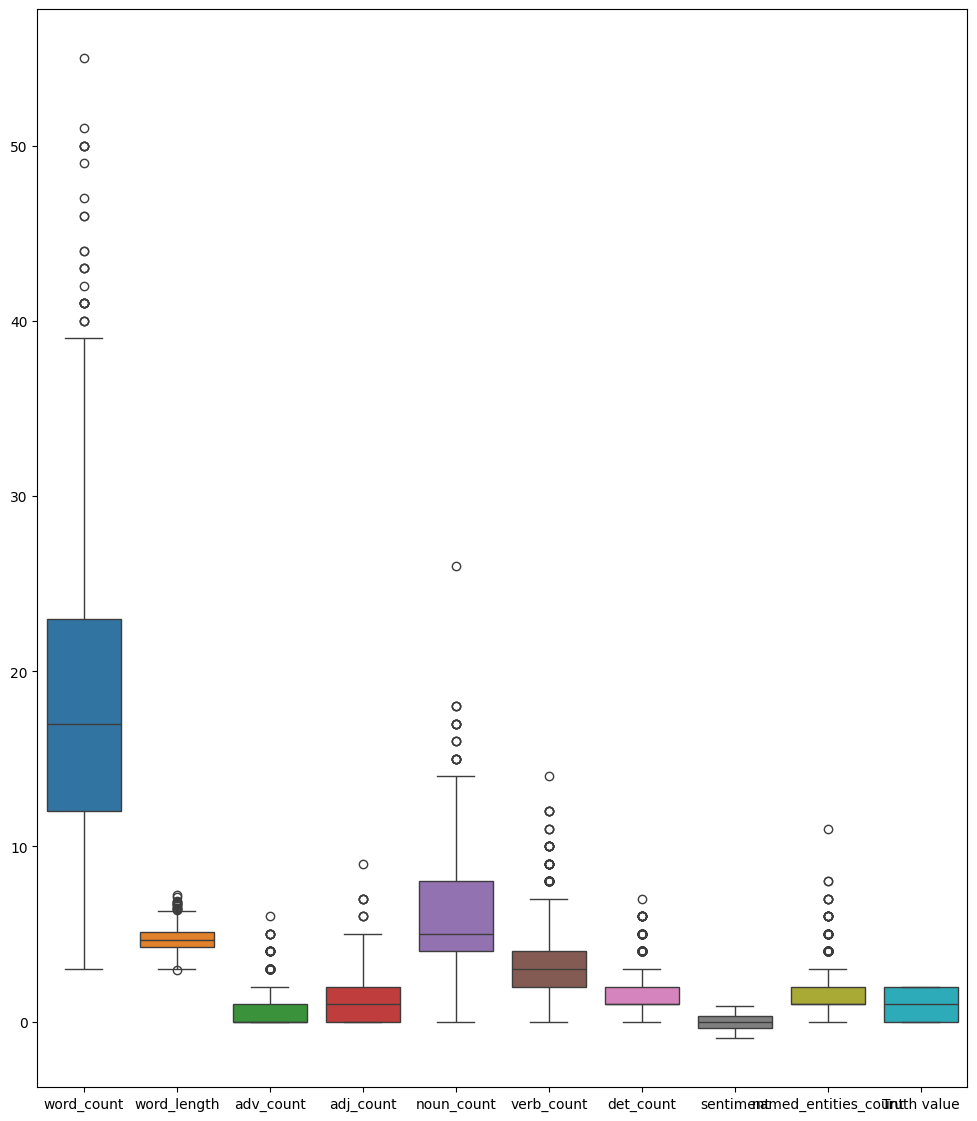

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,14))
sns.boxplot(df, ax = ax)

In [ ]:
df = df.drop(df[df['word_count']>32].index)
df = df.drop(df[df['noun_count']>13].index)
df = df.drop(df[df['word_length']>6].index)
df = df.drop(df[df['verb_count']>7].index)
df = df.drop(df[df['adv_count']>2].index)
df = df.drop(df[df['word_length']<3].index)
df = df.drop(df[df['adj_count']>5].index)
df = df.drop(df[df['named_entities_count']>4].index)
df = df.drop(df[df['det_count']>3].index)

<Axes: >

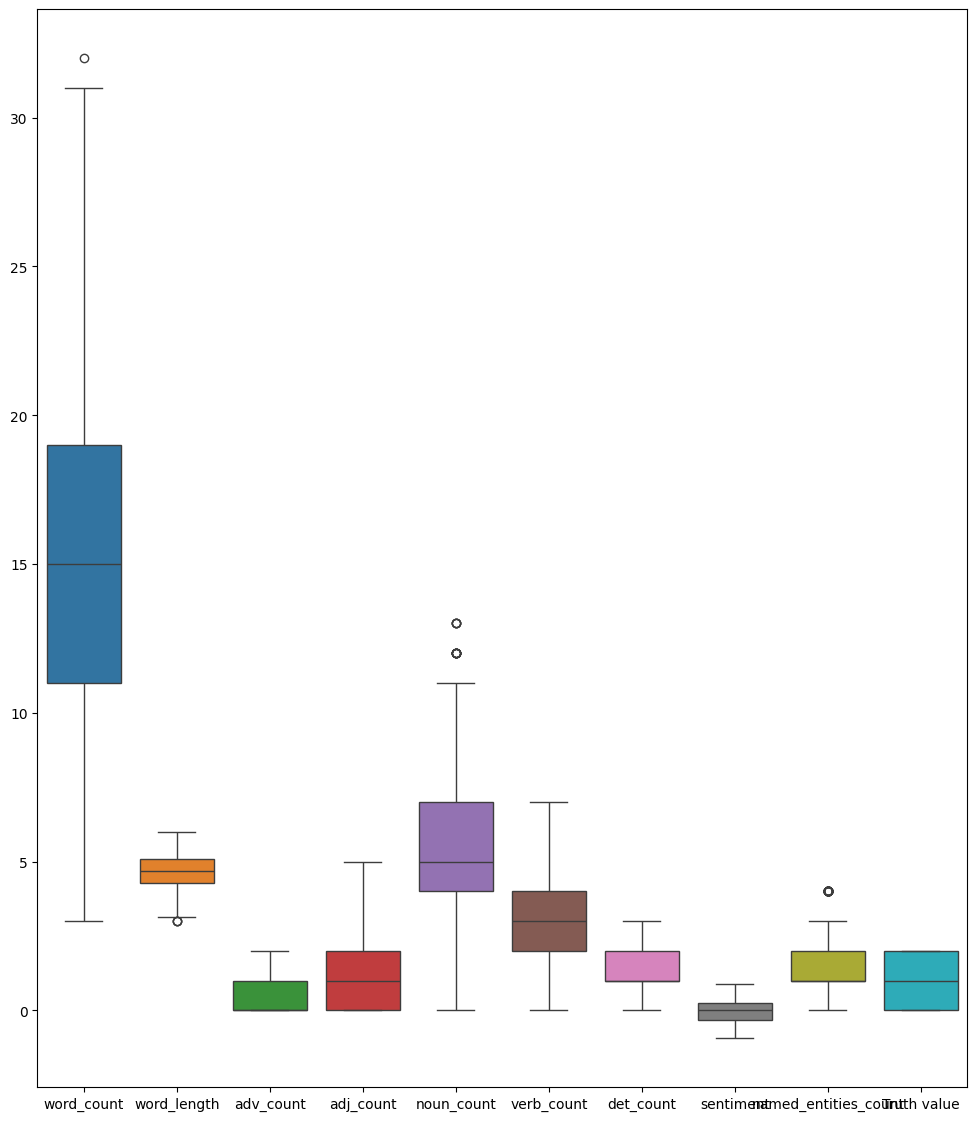

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))
sns.boxplot(df, ax = ax)

In [ ]:
df['Truth value'].value_counts()

Truth value
2    451
0    412
1    240
Name: count, dtype: int64

In [ ]:
x = df.drop(['Truth value'], axis=1)
y = df['Truth value']

In [ ]:
x.head()

,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities_count
12,11.0,5.181818,0.0,2.0,5.0,1.0,0.0,0.0000,1
30,9.0,5.555556,0.0,1.0,4.0,1.0,2.0,0.0000,1
51,13.0,4.692308,2.0,0.0,4.0,3.0,0.0,0.0000,2
157,20.0,4.850000,0.0,1.0,5.0,5.0,2.0,0.0176,1
168,20.0,3.900000,0.0,2.0,7.0,4.0,0.0,0.0000,2


In [ ]:
df.to_csv("politifact_cleaned.csv")